In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder, OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC

import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('/home/admin1/Downloads/machine_learning/Flask/Problem1/Social_Network_Ads.csv')

In [3]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


# Detecting Outliers if any

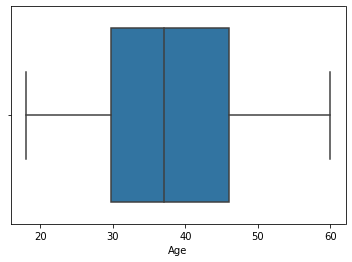

In [4]:
sb.boxplot(x='Age',data=data)
plt.show()

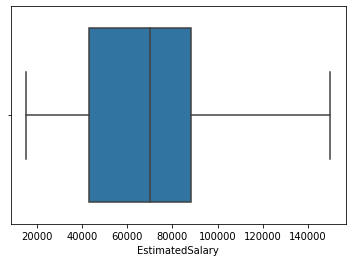

In [5]:
sb.boxplot(x=data['EstimatedSalary'])
plt.show()

In [6]:
len(data['User ID'].unique())

400

# Including the Column Gender for Prediction

In [7]:
data.drop(['User ID'], axis = 1, inplace = True)
data.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [8]:
x = data.iloc[:,0:-1]
y = data.iloc[:,-1:].values

In [10]:
standard_x = StandardScaler()
x.iloc[:,1:3] = standard_x.fit_transform(x.iloc[:,1:3])

In [11]:
lb = LabelEncoder()
x.iloc[:,0] = lb.fit_transform(x.iloc[:,0])

In [12]:
x.head()

,Gender,Age,EstimatedSalary
0,1,-1.781797,-1.490046
1,1,-0.253587,-1.460681
2,0,-1.113206,-0.785290
3,0,-1.017692,-0.374182
4,1,-1.781797,0.183751


In [13]:
ohe = OneHotEncoder(categorical_features = [0])
x = ohe.fit_transform(x).toarray()

In [14]:
x[0:3]

array([[ 0.        ,  1.        , -1.78179743, -1.49004624],
       [ 0.        ,  1.        , -0.25358736, -1.46068138],
       [ 1.        ,  0.        , -1.11320552, -0.78528968]])

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [16]:
svc = SVC(kernel = 'rbf', gamma = 0.7)
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)

In [17]:
score = accuracy_score(y_test, y_pred)
score

0.9083333333333333

# Excluding the column Gender while Prediction

In [18]:
df = pd.read_csv('/home/admin1/Downloads/machine_learning/Flask/Problem1/Social_Network_Ads.csv')

In [19]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [22]:
X = df.iloc[:,2:4].values
Y = df.iloc[:, -1:].values

In [23]:
X = standard_x.transform(X)

In [25]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [27]:
classifier = SVC(kernel = 'rbf', gamma = 0.7)
classifier.fit(Xtrain, Ytrain)
y_prediction = classifier.predict(Xtest)

In [28]:
accuracy = accuracy_score(Ytest, y_prediction)
accuracy

0.9083333333333333